In [ ]:
!pip install pandas scikit-learn scipy

In [ ]:
import pandas as pd
import numpy as np

# 사용자 선호도 데이터
user_preferences = {
    'travel_style': ['solo', 'family', 'friends', 'couple'],
    'budget': ['low', 'medium', 'high', 'medium'],
    'preferred_vibe': ['adventure', 'relaxing', 'cultural', 'romantic']
}

# 여행 장소 데이터
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

# 데이터프레임 생성
places = pd.DataFrame(place_data)

In [ ]:
places

,name,category,tags
0,채스터톤스 속초,호텔,"편안한, 아늑한, 오션뷰, 멋진"
1,속초중앙시장,시장,"맛있는, 신선한, 저렴한"
2,속초 751 샌드위치,카페,"맛있는, 신선한, 독특한"
3,라드리요,카페,"맛있는, 인테리어가 이쁜"
4,생생대게회직판장,식당,"신선한, 맛있는, 비싼 편인"
5,속초 항아리 물회,식당,"신선한, 맛있는"
6,속초 해수욕장,바닷가,"시원한, 풍경이 이쁜"
7,청초호,호수,"시원한, 풍경이 이쁜"
8,한화리조트 설악 쏘라노,호텔,"편안한, 아늑한, 넓은, 교통편이 좋은"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 태그 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(places['category'])

# 예산 및 분위기 등 다른 카테고리도 One-Hot Encoding 처리
places_encoded = pd.get_dummies(places['tags'])

# 벡터화된 특성 결합
from scipy.sparse import hstack, csr_matrix
places_features = hstack([tfidf_matrix, csr_matrix(places_encoded)])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 사용자의 선호도 벡터화 (same categories as in places_encoded)
user_pref_vector = tfidf_vectorizer.transform(['relaxing, cultural'])  # 예: 사용자가 'relaxing', 'cultural' 태그를 선호한다고 가정
user_pref_encoded = pd.get_dummies(pd.DataFrame({
    'category': ['cafe'],
    'tag': ['편안한'],
    'average_budget': ['low']
}))

# 원-핫 인코딩된 사용자 선호도를 places_encoded와 동일한 구조로 맞추기
user_pref_encoded = user_pref_encoded.reindex(columns=places_encoded.columns, fill_value=0)

# user_pref_encoded를 스파스 행렬로 변환
# Convert the DataFrame to a NumPy array with the correct data type
user_pref_encoded_np = user_pref_encoded.to_numpy().astype(np.float64)
user_pref_encoded_sparse = csr_matrix(user_pref_encoded_np)

# 사용자의 선호도와 각 장소의 특성 유사도 계산
user_pref_combined = hstack([user_pref_vector, user_pref_encoded_sparse])
similarity_scores = cosine_similarity(user_pref_combined, places_features)

# 유사도 점수를 기준으로 장소 추천
places['similarity_score'] = similarity_scores[0]
recommended_places = places.sort_values('similarity_score', ascending=False)

print(recommended_places[['name', 'similarity_score']])

           name  similarity_score
0      채스터톤스 속초               0.0
1        속초중앙시장               0.0
2   속초 751 샌드위치               0.0
3          라드리요               0.0
4      생생대게회직판장               0.0
5     속초 항아리 물회               0.0
6       속초 해수욕장               0.0
7           청초호               0.0
8  한화리조트 설악 쏘라노               0.0


In [ ]:
recommended_places.head(10)

,place_name,category,tags,vibe,average_budget,similarity_score
0,Beach Cafe,cafe,"relaxing, sea, coffee",relaxing,low,0.587597
2,City Museum,museum,"cultural, history, art",cultural,medium,0.344005
3,River Park,park,"relaxing, nature, water",relaxing,low,0.344005
4,Historic Bookstore,bookstore,"cultural, history, books",cultural,medium,0.344005
1,Mountain Lodge,lodge,"adventure, nature, hiking",adventure,high,0.000000


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack, csr_matrix
import numpy as np

# 여행 장소 데이터
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

# 데이터프레임 생성
places = pd.DataFrame(place_data)

# TF-IDF 벡터화 (쉼표를 기준으로 토큰화)
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
places_features = tfidf_vectorizer.fit_transform(places['tags'])

# 사용자 선호도 벡터화
user_pref_vector = tfidf_vectorizer.transform(['신선한, 재방문하고 싶은'])

# 코사인 유사도 계산
similarity_scores = cosine_similarity(user_pref_vector, places_features)

# 유사도 점수를 기준으로 장소 추천
places['similarity_score'] = similarity_scores[0]
recommended_places = places.sort_values('similarity_score', ascending=False)

print(recommended_places[['name', 'similarity_score']])


           name  similarity_score
5     속초 항아리 물회          0.746137
1        속초중앙시장          0.489617
2   속초 751 샌드위치          0.489617
4      생생대게회직판장          0.489617
0      채스터톤스 속초          0.000000
3          라드리요          0.000000
6       속초 해수욕장          0.000000
7           청초호          0.000000
8  한화리조트 설악 쏘라노          0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack, csr_matrix
import numpy as np

# 여행 장소 데이터
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

# 데이터프레임 생성
places = pd.DataFrame(place_data)

# TF-IDF 벡터화 (쉼표를 기준으로 토큰화)
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
places_features = tfidf_vectorizer.fit_transform(places['tags'])

# 단어 사전 생성
vocabulary = tfidf_vectorizer.get_feature_names_out()

# 커스텀 토크나이저: 쉼표를 기준으로 분리 및 OOV 처리
def custom_tokenizer(text, vocabulary):
    tokens = [i.strip() for i in text.split(',')]
    return [token if token in vocabulary else 'OOV' for token in tokens]

# 새로운 데이터를 처리할 때 OOV 처리 포함
def transform_with_oov(text, vectorizer, vocabulary):
    tokens = custom_tokenizer(text, vocabulary)
    processed_text = ' '.join(tokens)
    return vectorizer.transform([processed_text])

# 사용자 선호도 벡터화 (OOV 처리 포함)
user_pref_vector = transform_with_oov('신선한, 재방문하고 싶은', tfidf_vectorizer, vocabulary)

# 코사인 유사도 계산
similarity_scores = cosine_similarity(user_pref_vector, places_features)

# 유사도 점수를 기준으로 장소 추천
places['similarity_score'] = similarity_scores[0]
recommended_places = places.sort_values('similarity_score', ascending=False)

print(recommended_places[['name', 'similarity_score']])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


AttributeError: 'list' object has no attribute 'split'

In [ ]:
# 벡터화된 결과 확인
print(tfidf_vectorizer.get_feature_names_out())  # 사전에 있는 단어들 출력

['교통편이 좋은' '넓은' '독특한' '맛있는' '멋진' '비싼 편인' '시원한' '신선한' '아늑한' '오션뷰'
 '인테리어가 이쁜' '저렴한' '편안한' '풍경이 이쁜']


In [ ]:
from sklearn.decomposition import PCA

# 희소 행렬을 밀집 행렬로 변환
places_features_dense = places_features.toarray()

# PCA 모델 생성 및 적용
pca = PCA(n_components=0.95)
places_features_pca = pca.fit_transform(places_features_dense)

# 사용자 선호도 벡터를 밀집 행렬로 변환
user_pref_vector_dense = user_pref_vector.toarray()

# 사용자 선호도 벡터를 PCA로 변환
user_pref_vector_pca = pca.transform(user_pref_vector_dense)

# 코사인 유사도 계산
similarity_scores_pca = cosine_similarity(user_pref_vector_pca, places_features_pca)

# 유사도 점수를 기준으로 장소 추천
places['similarity_score_pca'] = similarity_scores_pca[0]
recommended_places_pca = places.sort_values('similarity_score_pca', ascending=False)

print(recommended_places_pca[['name', 'similarity_score_pca']])

           name  similarity_score_pca
6       속초 해수욕장              0.630295
7           청초호              0.630295
8  한화리조트 설악 쏘라노              0.622017
0      채스터톤스 속초             -0.092371
3          라드리요             -0.219186
4      생생대게회직판장             -0.428981
1        속초중앙시장             -0.428981
2   속초 751 샌드위치             -0.428981
5     속초 항아리 물회             -0.719387


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 기존 여행 장소 데이터
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

# 데이터프레임 생성
places = pd.DataFrame(place_data)

# 새로운 장소 정보
new_place = {
    "name": "강스 커피",
    "category": "카페",
    "tags": "아늑한, 인테리어가 이쁜, 커피가 맛있는"
}

# 모든 태그를 포함하는 리스트 생성
all_tags = places['tags'].tolist() + [new_place['tags']]

# TF-IDF 벡터라이저 생성 및 적용
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
all_features = tfidf_vectorizer.fit_transform(all_tags)

# 기존 장소와 새로운 장소의 특성 분리
places_features = all_features[:-1]
new_place_features = all_features[-1]

# 코사인 유사도 계산
similarity_scores = cosine_similarity(new_place_features, places_features)

# 유사도 점수를 기존 데이터프레임에 추가
places['similarity_score'] = similarity_scores[0]

# 유사도 점수를 기준으로 장소 추천
recommended_places = places.sort_values('similarity_score', ascending=False)

print(f"새로운 장소: {new_place['name']}")
print("\n유사도가 높은 기존 장소:")
print(recommended_places[['name', 'similarity_score']])

새로운 장소: 강스 커피

유사도가 높은 기존 장소:
           name  similarity_score
3          라드리요          0.461960
0      채스터톤스 속초          0.202584
8  한화리조트 설악 쏘라노          0.202584
1        속초중앙시장          0.000000
2   속초 751 샌드위치          0.000000
4      생생대게회직판장          0.000000
5     속초 항아리 물회          0.000000
6       속초 해수욕장          0.000000
7           청초호          0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# 기존 여행 장소 데이터
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

# 데이터프레임 생성
places = pd.DataFrame(place_data)

# 새로운 장소 정보
new_place = {
    "name": "강스 커피",
    "category": "카페",
    "tags": "아늑한, 인테리어가 이쁜, 커피가 맛있는"
}

# 모든 태그를 포함하는 리스트 생성
all_tags = places['tags'].tolist() + [new_place['tags']]

# TF-IDF 벡터라이저 생성 및 적용
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
all_features = tfidf_vectorizer.fit_transform(all_tags)

# PCA 적용
n_components = min(5, all_features.shape[1])  # 차원 수 선택 (최대 5 또는 원본 특성 수)
pca = PCA(n_components=n_components)
all_features_pca = pca.fit_transform(all_features.toarray())

# 기존 장소와 새로운 장소의 특성 분리
places_features_pca = all_features_pca[:-1]
new_place_features_pca = all_features_pca[-1].reshape(1, -1)

# 코사인 유사도 계산
similarity_scores = cosine_similarity(new_place_features_pca, places_features_pca)

# 유사도 점수를 기존 데이터프레임에 추가
places['similarity_score'] = similarity_scores[0]

# 유사도 점수를 기준으로 장소 추천
recommended_places = places.sort_values('similarity_score', ascending=False)

print(f"새로운 장소: {new_place['name']}")
print("\n유사도가 높은 기존 장소:")
print(recommended_places[['name', 'similarity_score']])

# PCA가 유지한 분산의 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("\nPCA 설명된 분산 비율:")
print(explained_variance_ratio)
print(f"총 설명된 분산: {np.sum(explained_variance_ratio):.2f}")

새로운 장소: 강스 커피

유사도가 높은 기존 장소:
           name  similarity_score
3          라드리요          0.756204
0      채스터톤스 속초          0.168195
8  한화리조트 설악 쏘라노          0.168195
6       속초 해수욕장         -0.199676
7           청초호         -0.199676
1        속초중앙시장         -0.401038
2   속초 751 샌드위치         -0.507061
5     속초 항아리 물회         -0.547755
4      생생대게회직판장         -0.553628

PCA 설명된 분산 비율:
[0.30387805 0.2337176  0.15388106 0.07974355 0.07297358]
총 설명된 분산: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.preprocessing import Normalizer

# 데이터 준비 (기존 코드와 동일)
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

places = pd.DataFrame(place_data)

new_place = {
    "name": "강스 커피",
    "category": "카페",
    "tags": "아늑한, 인테리어가 이쁜, 커피가 맛있는"
}

# 모든 태그를 포함하는 리스트 생성
all_tags = places['tags'].tolist() + [new_place['tags']]

# 유사도 계산을 위한 커스텀 스코어 함수
def cosine_similarity_score(estimator, X):
    features = estimator.transform(X)
    similarity_matrix = cosine_similarity(features)
    return np.mean(similarity_matrix[:-1, -1])  # 새 장소와 기존 장소들 간의 평균 유사도

# 파이프라인 변경
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])),
    ('nmf', NMF(random_state=42)),
    ('normalizer', Normalizer())
])

# 동적으로 n_components 범위 설정
def get_n_components(X):
    tfidf = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
    n_features = tfidf.fit_transform(X).shape[1]
    return randint(2, min(n_features, 6))

# 하이퍼파라미터 탐색 공간 정의
param_distributions = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    # 'svd__n_components': get_n_components(all_tags),
    'nmf__n_components': get_n_components(all_tags)
}

# RandomizedSearchCV 설정
n_iter = 20  # 탐색할 파라미터 조합의 수
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=n_iter, scoring=cosine_similarity_score,
    cv=cv, random_state=42, n_jobs=-1
)

# 탐색 수행
random_search.fit(all_tags)

# 최적의 하이퍼파라미터 및 모델 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)
print("최고 점수:", random_search.best_score_)

# 최적의 모델을 사용하여 특성 추출
best_pipeline = random_search.best_estimator_
all_features = best_pipeline.transform(all_tags)

# 기존 장소와 새로운 장소의 특성 분리
places_features = all_features[:-1]
new_place_features = all_features[-1].reshape(1, -1)

# 코사인 유사도 계산
similarity_scores = cosine_similarity(new_place_features, places_features)

# 유사도 점수를 기존 데이터프레임에 추가
places['similarity_score'] = similarity_scores[0]

# 유사도 점수를 기준으로 장소 추천
recommended_places = places.sort_values('similarity_score', ascending=False)

print(f"\n새로운 장소: {new_place['name']}")
print("\n유사도가 높은 기존 장소:")
print(recommended_places[['name', 'similarity_score']])

# NMF가 유지한 분산의 비율 출력 (최적 모델의 NMF에 대해)
nmf = best_pipeline.named_steps['nmf']

# 최적 모델의 NMF을 통해 나온 W, H 행렬
W = nmf.transform(best_pipeline.named_steps['tfidf'].transform(all_tags))  # Transform the input data
H = nmf.components_  # Get the components from the trained NMF model

# 재구성된 행렬 계산
reconstructed_matrix = np.dot(W, H)

# 원본 TF-IDF 행렬 (sparse matrix)을 dense matrix로 변환하여 비교
original_matrix = best_pipeline.named_steps['tfidf'].transform(all_tags).toarray()

# 재구성 오차 계산 (원본 행렬과 재구성된 행렬의 차이)
reconstruction_error = np.linalg.norm(original_matrix - reconstructed_matrix, 'fro')

print(f"\nNMF 재구성 오차: {reconstruction_error}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


최적의 하이퍼파라미터: {'nmf__n_components': 2, 'tfidf__max_df': 0.75, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
최고 점수: 0.40006096249601625

새로운 장소: 강스 커피

유사도가 높은 기존 장소:
           name  similarity_score
0      채스터톤스 속초          0.997267
6       속초 해수욕장          0.997267
7           청초호          0.997267
8  한화리조트 설악 쏘라노          0.997267
3          라드리요          0.589609
1        속초중앙시장          0.073876
2   속초 751 샌드위치          0.073876
4      생생대게회직판장          0.073876
5     속초 항아리 물회          0.073876

NMF 재구성 오차: 2.1393748674796518


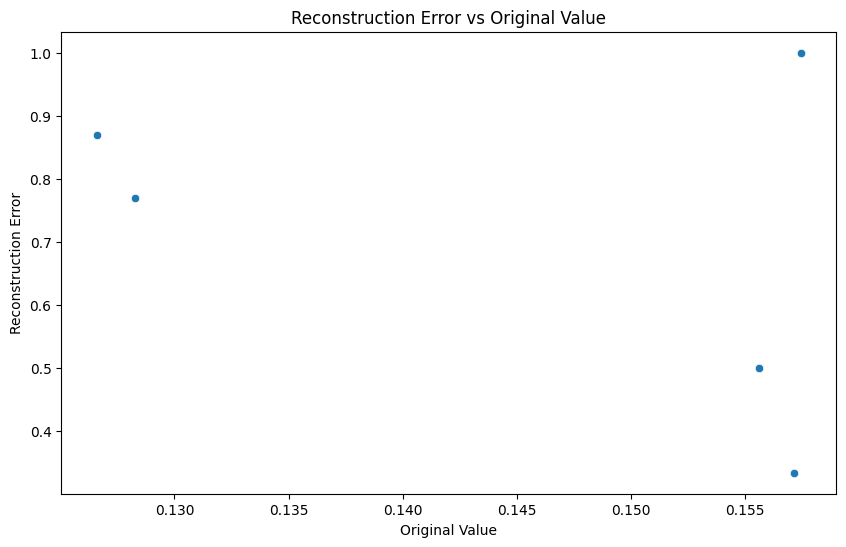

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

original_matrix = best_pipeline.named_steps['tfidf'].transform(all_tags).toarray()
reconstructed_matrix = np.dot(W, H)
# 오차 계산
reconstruction_errors = np.linalg.norm(original_matrix - reconstructed_matrix, axis=1)

# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({
    'Original Value': np.mean(original_matrix, axis=1),
    'Reconstruction Error': reconstruction_errors
})

# 산점도 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Value', y='Reconstruction Error', data=df)
plt.title('Reconstruction Error vs Original Value')
plt.xlabel('Original Value')
plt.ylabel('Reconstruction Error')
plt.show()


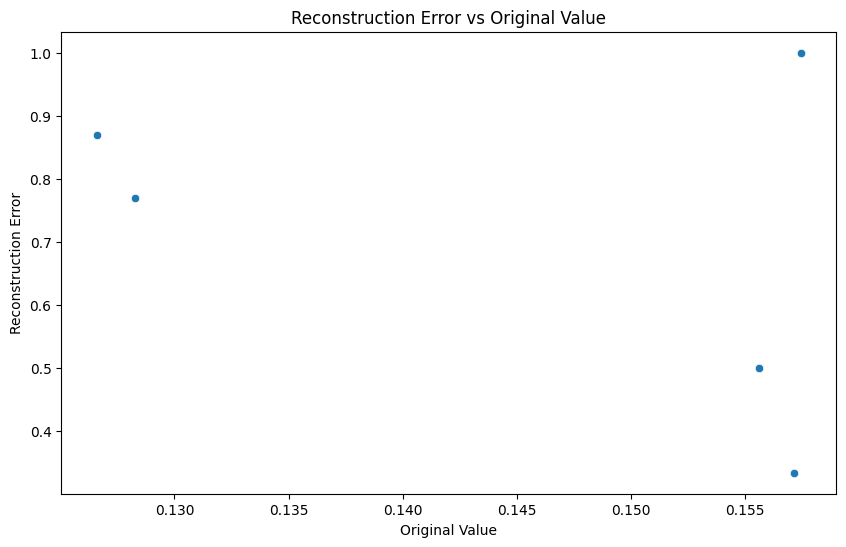

In [ ]:
import seaborn as sns
import pandas as pd

# 원본 데이터의 평균 계산
mean_original_values = np.mean(original_matrix, axis=1)

# 데이터프레임 생성
df = pd.DataFrame({
    'Original Value': mean_original_values,
    'Reconstruction Error': reconstruction_errors
})

# 산점도 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Value', y='Reconstruction Error', data=df)
plt.title('Reconstruction Error vs Original Value')
plt.xlabel('Original Value')
plt.ylabel('Reconstruction Error')
plt.show()


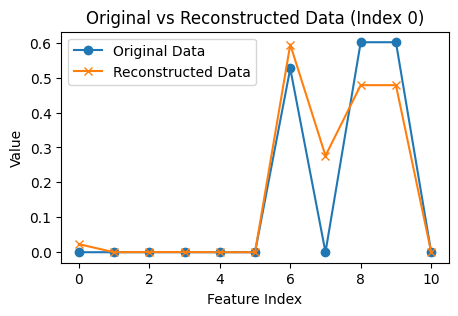

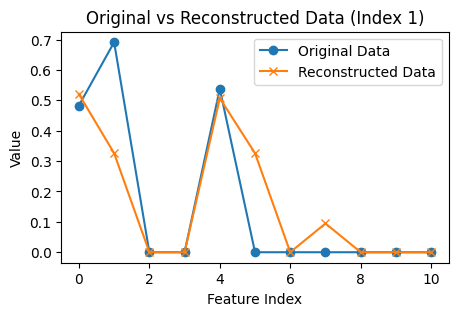

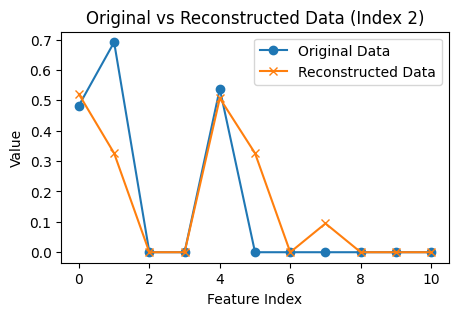

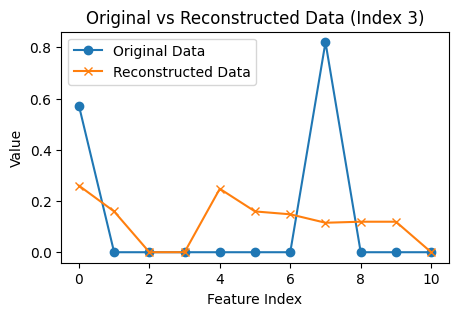

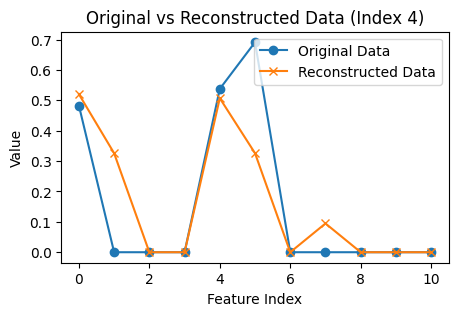

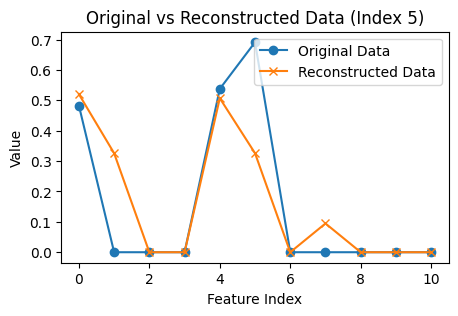

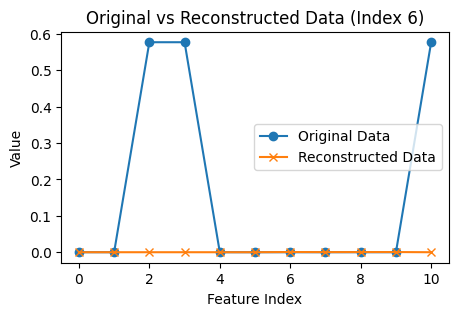

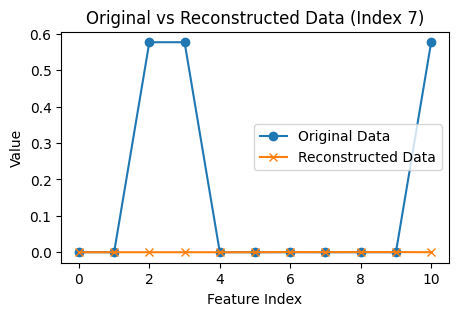

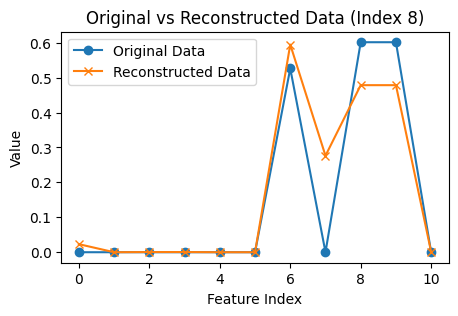

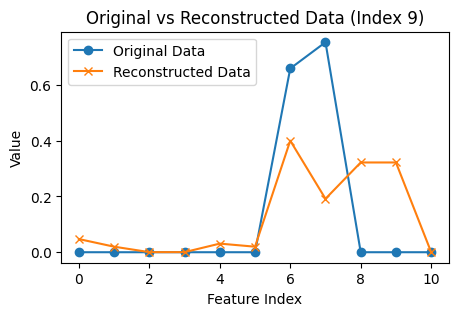

In [ ]:
# 특정 데이터 포인트 선택 (예를 들어 첫 번째 데이터 포인트)
for i in range(len(original_matrix)):
    index = i

    # 원본 데이터와 재구성된 데이터
    original_data_point = original_matrix[index]
    reconstructed_data_point = reconstructed_matrix[index]

    # 플롯 시각화
    plt.figure(figsize=(5, 3))
    plt.plot(original_data_point, label='Original Data', marker='o')
    plt.plot(reconstructed_data_point, label='Reconstructed Data', marker='x')
    plt.title(f'Original vs Reconstructed Data (Index {index})')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import make_scorer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.preprocessing import Normalizer
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

# 데이터 준비 (기존 코드와 동일)
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

places = pd.DataFrame(place_data)

new_place = {
    "name": "강스 커피",
    "category": "카페",
    "tags": "아늑한, 인테리어가 이쁜, 커피가 맛있는"
}

# 모든 태그를 포함하는 리스트 생성
all_tags = places['tags'].tolist() + [new_place['tags']]

# 유사도 계산을 위한 커스텀 스코어 함수 수정
def cosine_similarity_score(estimator, X, y=None):
    features = estimator.transform(X)
    similarity_matrix = cosine_similarity(features)
    return np.mean(similarity_matrix[:-1, -1])  # 새 장소와 기존 장소들 간의 평균 유사도

# 스코어러 생성
cosine_scorer = make_scorer(cosine_similarity_score, greater_is_better=True)

# 파이프라인 변경
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])),
    ('svd', TruncatedSVD(random_state=42)),
    ('normalizer', Normalizer())
])

# 동적으로 n_components 범위 설정
def get_n_components(X):
    tfidf = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
    n_features = tfidf.fit_transform(X).shape[1]
    return Integer(2, min(n_features, 6))  # Integer 범위를 반환하도록 수정

# 하이퍼파라미터 탐색 공간 정의 (Bayesian Optimization)
param_spaces = {
    'tfidf__max_df': Real(0.5, 1.0),
    'tfidf__min_df': Integer(1, 3),
    'tfidf__ngram_range': Categorical([(1, 1), (1, 2), (1, 3)]),
    'svd__n_components': Integer(2, 6)  # 직접 범위 지정
}

# Bayesian Optimization을 사용하는 BayesSearchCV 설정
bayes_search = BayesSearchCV(
    pipeline, param_spaces, n_iter=20, scoring=cosine_scorer,
    cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, random_state=42
)

# 탐색 수행
bayes_search.fit(all_tags)

# 최적의 하이퍼파라미터 및 모델 출력
print("최적의 하이퍼파라미터:", bayes_search.best_params_)
print("최고 점수:", bayes_search.best_score_)

# 최적의 모델을 사용하여 특성 추출
best_pipeline = bayes_search.best_estimator_
all_features = best_pipeline.transform(all_tags)

# 기존 장소와 새로운 장소의 특성 분리
places_features = all_features[:-1]
new_place_features = all_features[-1].reshape(1, -1)

# 코사인 유사도 계산
similarity_scores = cosine_similarity(new_place_features, places_features)

# 유사도 점수를 기존 데이터프레임에 추가
places['similarity_score'] = similarity_scores[0]

# 유사도 점수를 기준으로 장소 추천
recommended_places = places.sort_values('similarity_score', ascending=False)

print(f"\n새로운 장소: {new_place['name']}")
print("\n유사도가 높은 기존 장소:")
print(recommended_places[['name', 'similarity_score']])

# TruncatedSVD가 유지한 분산의 비율 출력 (최적 모델의 SVD에 대해)
svd = best_pipeline.named_steps['svd']

# 최적 모델의 SVD를 통해 나온 U, Sigma, V 행렬
U = svd.transform(best_pipeline.named_steps['tfidf'].transform(all_tags))  # Transform the input data
Sigma = svd.singular_values_  # Get the singular values from the trained SVD model
V = svd.components_  # Get the components (V^T matrix) from the trained SVD model

# 재구성된 행렬 계산
reconstructed_matrix = np.dot(U, V)

# 원본 TF-IDF 행렬 (sparse matrix)을 dense matrix로 변환하여 비교
original_matrix = best_pipeline.named_steps['tfidf'].transform(all_tags).toarray()

# 재구성 오차 계산 (원본 행렬과 재구성된 행렬의 차이)
reconstruction_error = np.linalg.norm(original_matrix - reconstructed_matrix, 'fro')

print(f"\nTruncatedSVD 재구성 오차: {reconstruction_error}")


ValueError: can only convert an array of size 1 to a Python scalar

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.preprocessing import Normalizer

# 데이터 준비 (기존 코드와 동일)
place_data = {
    "name": [
        "채스터톤스 속초", "속초중앙시장", "속초 751 샌드위치", "라드리요",
        "생생대게회직판장", "속초 항아리 물회", "속초 해수욕장", "청초호",
        "한화리조트 설악 쏘라노"
    ],
    "category": [
        "호텔", "시장", "카페", "카페",
        "식당", "식당", "바닷가", "호수",
        "호텔"
    ],
    "tags": [
        "편안한, 아늑한, 오션뷰, 멋진", "맛있는, 신선한, 저렴한", "맛있는, 신선한, 독특한", "맛있는, 인테리어가 이쁜",
        "신선한, 맛있는, 비싼 편인", "신선한, 맛있는", "시원한, 풍경이 이쁜", "시원한, 풍경이 이쁜",
        "편안한, 아늑한, 넓은, 교통편이 좋은"
    ]
}

places = pd.DataFrame(place_data)

new_place = {
    "name": "강스 커피",
    "category": "카페",
    "tags": "아늑한, 인테리어가 이쁜, 커피가 맛있는"
}

# 모든 태그를 포함하는 리스트 생성
all_tags = places['tags'].tolist() + [new_place['tags']]

# 유사도 계산을 위한 커스텀 스코어 함수
def cosine_similarity_score(estimator, X):
    features = estimator.transform(X)
    similarity_matrix = cosine_similarity(features)
    return np.mean(similarity_matrix[:-1, -1])  # 새 장소와 기존 장소들 간의 평균 유사도

# 파이프라인 변경
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])),
    ('svd', TruncatedSVD(random_state=42)),
    ('normalizer', Normalizer())
])

# 동적으로 n_components 범위 설정
def get_n_components(X):
    tfidf = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
    n_features = tfidf.fit_transform(X).shape[1]
    return randint(2, min(n_features, 6))

# 하이퍼파라미터 탐색 공간 정의
param_distributions = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'svd__n_components': get_n_components(all_tags)
}

# RandomizedSearchCV 설정
n_iter = 20  # 탐색할 파라미터 조합의 수
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=n_iter, scoring=cosine_similarity_score,
    cv=cv, random_state=42, n_jobs=-1
)

# 탐색 수행
random_search.fit(all_tags)

# 최적의 하이퍼파라미터 및 모델 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)
print("최고 점수:", random_search.best_score_)

# 최적의 모델을 사용하여 특성 추출
best_pipeline = random_search.best_estimator_
all_features = best_pipeline.transform(all_tags)

# 기존 장소와 새로운 장소의 특성 분리
places_features = all_features[:-1]
new_place_features = all_features[-1].reshape(1, -1)

# 코사인 유사도 계산
similarity_scores = cosine_similarity(new_place_features, places_features)

# 유사도 점수를 기존 데이터프레임에 추가
places['similarity_score'] = similarity_scores[0]

# 유사도 점수를 기준으로 장소 추천
recommended_places = places.sort_values('similarity_score', ascending=False)

print(f"\n새로운 장소: {new_place['name']}")
print("\n유사도가 높은 기존 장소:")
print(recommended_places[['name', 'similarity_score']])

# TruncatedSVD가 유지한 분산의 비율 출력 (최적 모델의 SVD에 대해)
svd = best_pipeline.named_steps['svd']

# 최적 모델의 SVD를 통해 나온 U, Sigma, V 행렬
U = svd.transform(best_pipeline.named_steps['tfidf'].transform(all_tags))  # Transform the input data
Sigma = svd.singular_values_  # Get the singular values from the trained SVD model
V = svd.components_  # Get the components (V^T matrix) from the trained SVD model

# 재구성된 행렬 계산
reconstructed_matrix = np.dot(U, V)

# 원본 TF-IDF 행렬 (sparse matrix)을 dense matrix로 변환하여 비교
original_matrix = best_pipeline.named_steps['tfidf'].transform(all_tags).toarray()

# 재구성 오차 계산 (원본 행렬과 재구성된 행렬의 차이)
reconstruction_error = np.linalg.norm(original_matrix - reconstructed_matrix, 'fro')

print(f"\nTruncatedSVD 재구성 오차: {reconstruction_error}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


최적의 하이퍼파라미터: {'svd__n_components': 2, 'tfidf__max_df': 0.75, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
최고 점수: 0.4

새로운 장소: 강스 커피

유사도가 높은 기존 장소:
           name  similarity_score
0      채스터톤스 속초      9.841590e-01
8  한화리조트 설악 쏘라노      9.841590e-01
3          라드리요      6.453858e-01
4      생생대게회직판장      1.255703e-01
5     속초 항아리 물회      1.255703e-01
1        속초중앙시장      1.255703e-01
2   속초 751 샌드위치      1.255703e-01
6       속초 해수욕장     -1.427321e-16
7           청초호     -1.427321e-16

TruncatedSVD 재구성 오차: 2.136367620180239


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
33 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklear